#**Ejercicio sobre KMeans**
###**Tarea**
Tu tarea es realizar la segmentación de clientes utilizando KMeans. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, los años de educación en el empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresa el índice para separarlos por segmentos. Puedes descargar los datos aquí. Los datos originales provienen de esta fuente.



##**Parte 1**
Utiliza KMeans para crear varios segmentos de clientes.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [45]:
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_8/Clientes.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [46]:
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [47]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [48]:
df = df.dropna()

In [49]:
df = df.iloc[: , 1:]

In [50]:
df.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [51]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


In [52]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)

No hay una separacion clara entre estas variables

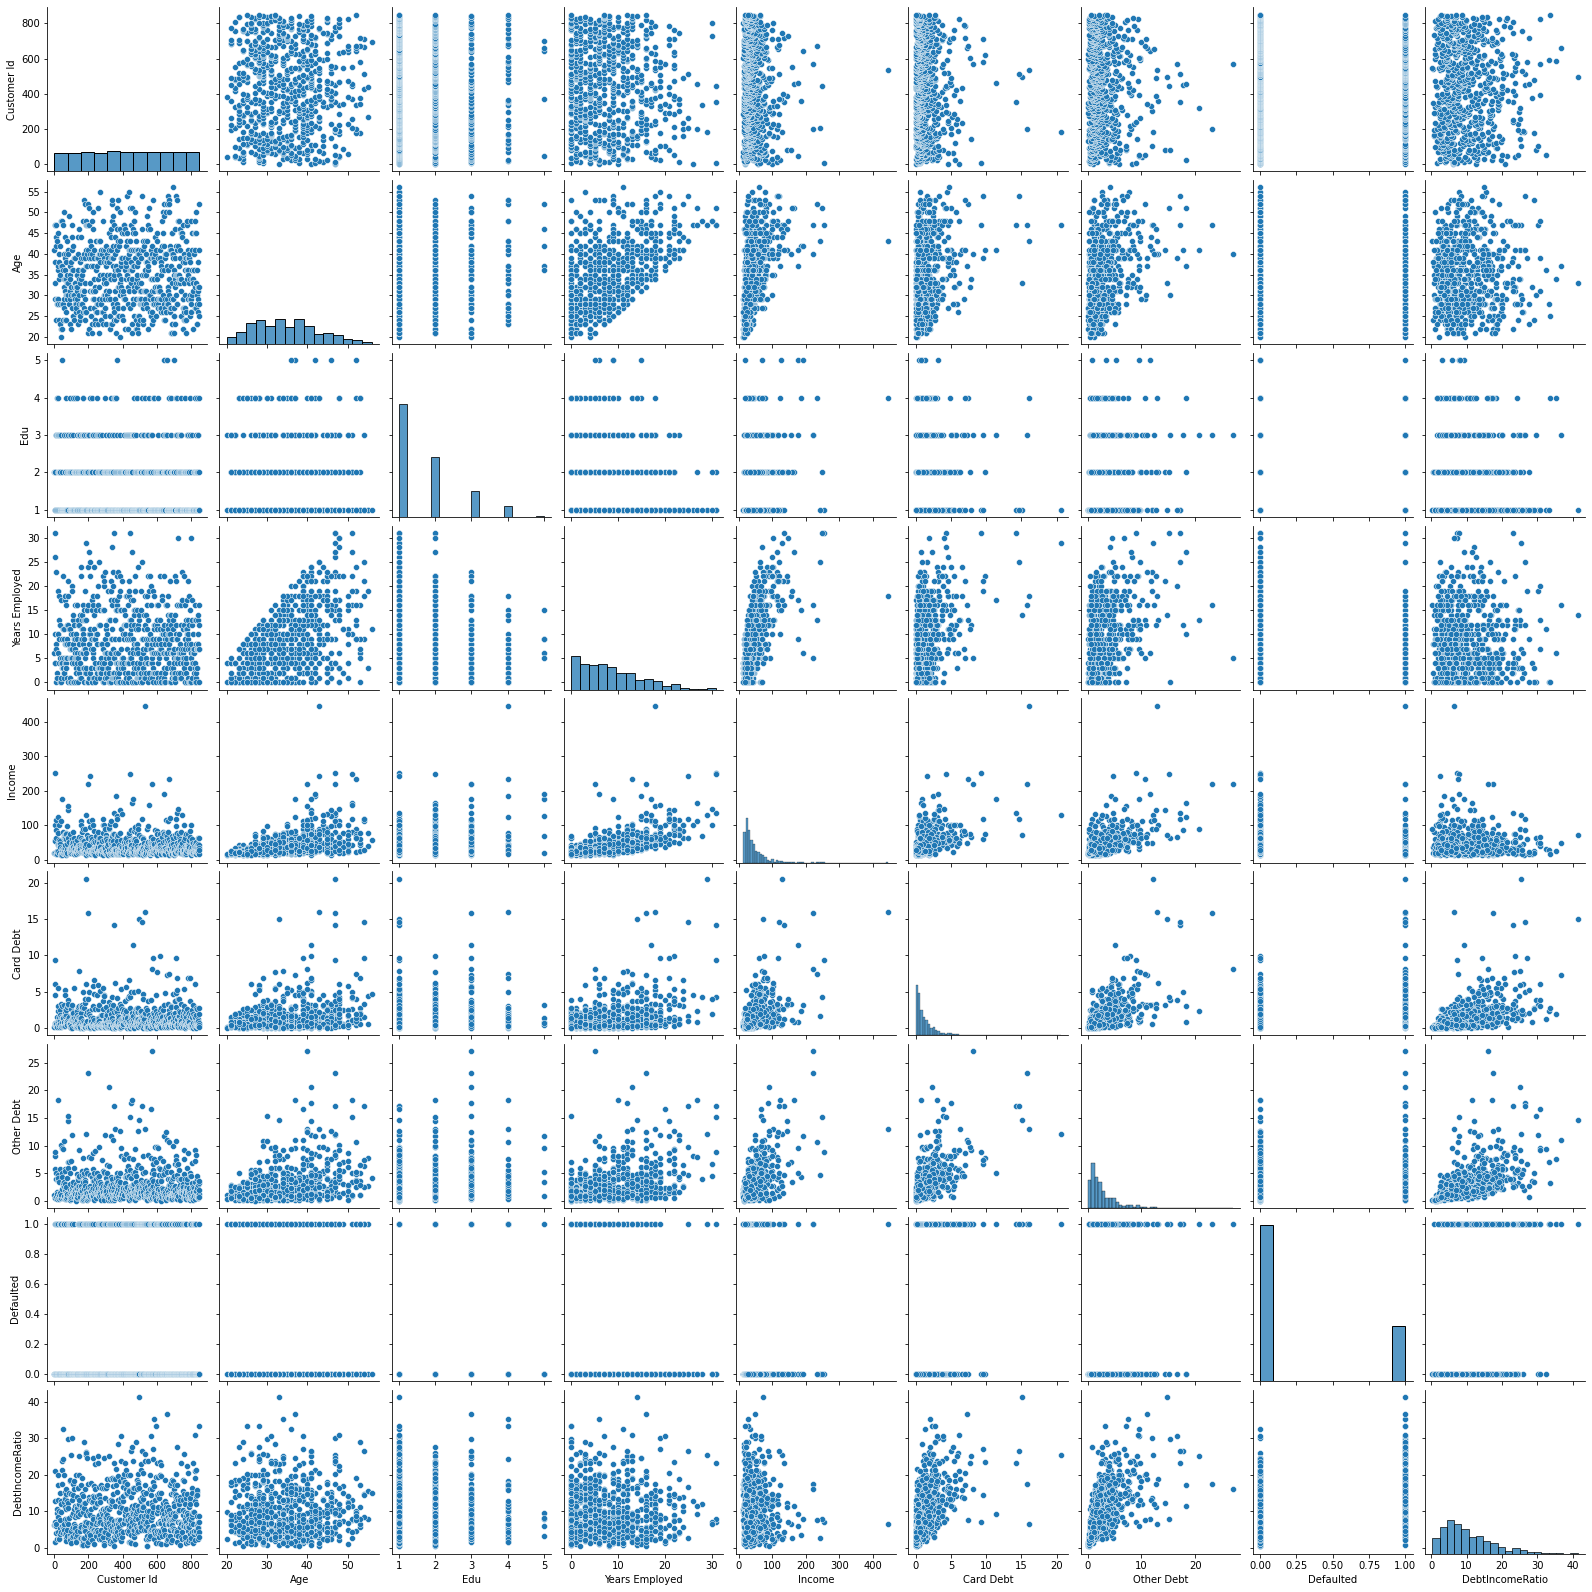

In [53]:
# Visualizar datos
sns.pairplot(df)

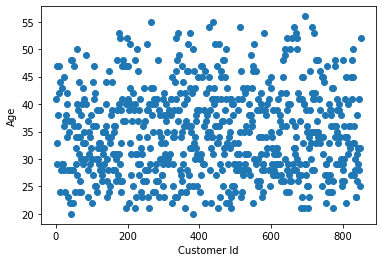

In [54]:
plt.scatter(df['Customer Id'], df['Age'])
plt.xlabel('Customer Id')
plt.ylabel('Age');

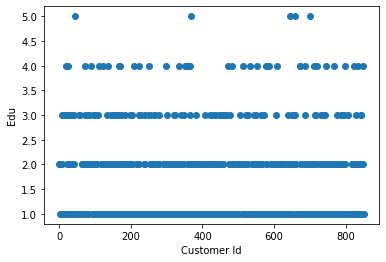

In [55]:
plt.scatter(df['Customer Id'], df['Edu'])
plt.xlabel('Customer Id')
plt.ylabel('Edu');

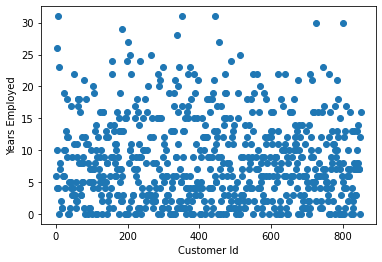

In [56]:
plt.scatter(df['Customer Id'], df['Years Employed'])
plt.xlabel('Customer Id')
plt.ylabel('Years Employed');

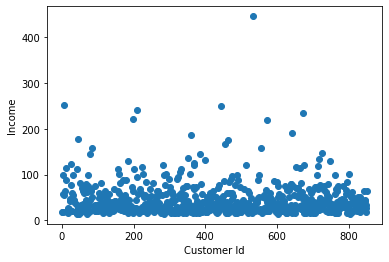

In [57]:
plt.scatter(df['Customer Id'], df['Income'])
plt.xlabel('Customer Id')
plt.ylabel('Income');

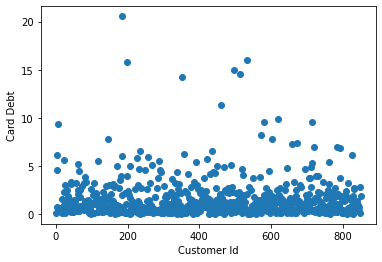

In [58]:
plt.scatter(df['Customer Id'], df['Card Debt'])
plt.xlabel('Customer Id')
plt.ylabel('Card Debt');


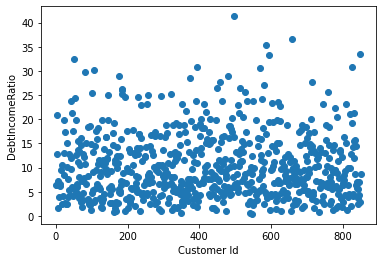

In [59]:
plt.scatter(df['Customer Id'], df['DebtIncomeRatio'])
plt.xlabel('Customer Id')
plt.ylabel('DebtIncomeRatio');


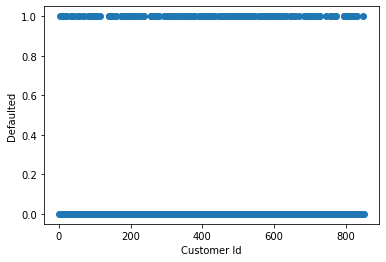

In [60]:
plt.scatter(df['Customer Id'], df['Defaulted'])
plt.xlabel('Customer Id')
plt.ylabel('Defaulted');


In [121]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [122]:
y_kmeans = kmeans.fit_predict(df)

In [123]:

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


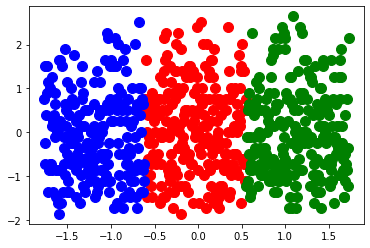

In [124]:
plt.scatter(scaled_df[y_kmeans==0, 0], scaled_df[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(scaled_df[y_kmeans==1, 0], scaled_df[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(scaled_df[y_kmeans==2, 0], scaled_df[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(scaled_df[y_kmeans==3, 0], scaled_df[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')




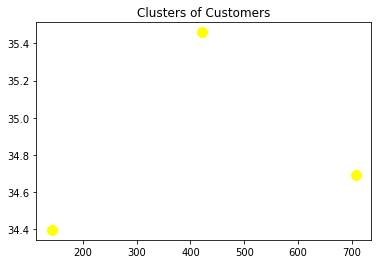

In [125]:
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.show()

Las variables de esta base no permiten hace menos de 3 clusters para estos clientes.

##**Parte 2**
Explora tus diversos segmentos de clientes. ¿Cuáles son las tendencias en los segmentos? Crea al menos dos visualizaciones que exploren las tendencias en los grupos.

In [126]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.694,1.198,0.0,4.4,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,3
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0


No handles with labels found to put in legend.


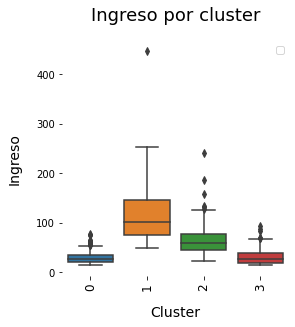

In [127]:
sns.catplot(data=df, kind='box', x='cluster', y='Income', sharey=True, height=4)
plt.title('Ingreso por cluster', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Cluster', fontsize=14, labelpad=15)
plt.ylabel('Ingreso', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


1. La media de los ingresos del grupo 1 es más alta que los demás grupos. El cluster 2 tiene una mayor cantidad de outliers más altos. La distribución del clster 0 y 3 no es tan grande, los cuartiles están muy cerca. El grupo 1 es el que tiene menos gente pero tiene más ingresos en promedio.

No handles with labels found to put in legend.


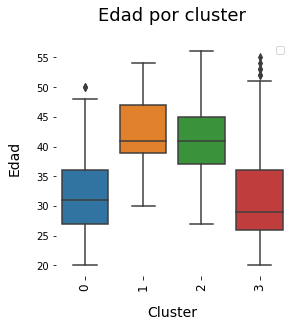

In [128]:
sns.catplot(data=df, kind='box', x='cluster', y='Age', sharey=True, height=4)
plt.title('Edad por cluster', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Cluster', fontsize=14, labelpad=15)
plt.ylabel('Edad', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

2. La edad del cluster 1 y 2 en promedio es de 41 años aproximadamente. El grupo 3 es el que tiene más edades atipicas. La edad mínima del grupo 1 es 30 años que es mayor a la edad mínima que los demás grupos. 

<Figure size 720x432 with 0 Axes>

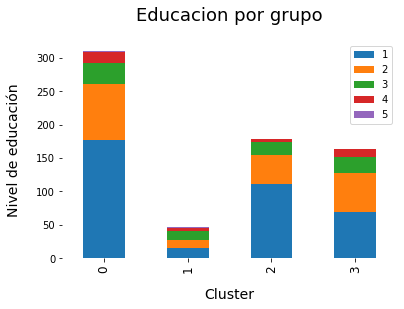

In [129]:

graph=df.groupby(['cluster','Edu'])['Edu'].count().unstack('Edu')
plt.figure(figsize=(10, 6))
itemsize = graph.apply(lambda x: x*100/sum(x), axis=1)
p1=graph.plot(kind="bar",stacked=True)
plt.title('Educacion por grupo', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Cluster', fontsize=14, labelpad=15)
plt.ylabel('Nivel de educación', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

3. La educación nivel 1 es la que predomina en los grupos. El grupo 1 es el que tiene más gente con nivel 3.

No handles with labels found to put in legend.


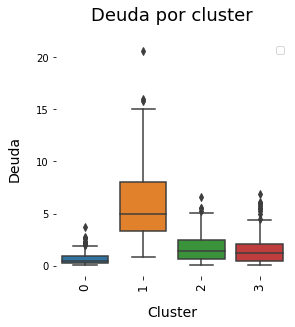

In [131]:
sns.catplot(data=df, kind='box', x='cluster', y='Card Debt', sharey=True, height=4)
plt.title('Deuda por cluster', fontsize=18, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('Cluster', fontsize=14, labelpad=15)
plt.ylabel('Deuda', fontsize=14, labelpad=15)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

4. El grupo 1 es que tiene más ingresos y más deuda.